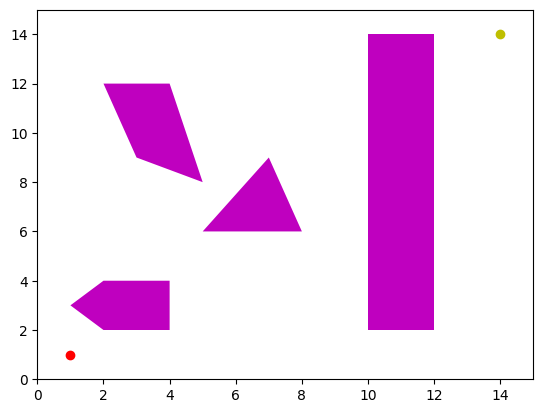

In [24]:
""" The goal of this code is to take a collection of polygons
    with integer coordinates and returns a path that traverses 
    the obstacles """

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

polygons = [[(1,1)],
            [(2,2), (4,2), (4,4), (2,4), (1,3)],
            [(5,6), (8,6), (7,9)],
            [(10,2), (12,2), (12,14), (10,14)],
            [(3,9), (5,8), (4,12), (2,12)],
            [(14,14)]]

start = polygons[0][0]
end = polygons[-1][0]

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,15])
ax.set_ylim([0,15])
plt.show()


In [25]:
def line_intersection(a, b, c, d):
    denom = ((a[0] - b[0]) * (c[1] - d[1]) - (a[1] - b[1]) * (c[0] - d[0]))
    if denom == 0:
        return False
    t = ((a[0] - c[0]) * (c[1] - d[1]) - (a[1] - c[1]) * (c[0] - d[0])) / denom
    u = ((a[0] - c[0]) * (a[1] - b[1]) - (a[1] - c[1]) * (a[0] - b[0])) / denom
    # check if line actually intersect
    if (0 <= t and t <= 1 and 0 <= u and u <= 1):
        return [a[0] + t * (b[0] - a[0]), a[1] + t * (b[1] - a[1])]
    else: 
        return False

def distance2(a,b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

D = dict()

def intersection(u, v):
    for p in polygons:
        N = len(p)
        r = distance2(u,v)
        for i in range(N):
            if(i < N - 1):
                z = line_intersection(u, v, p[i], p[i+1])
            if(i == N - 1):
                z = line_intersection(u, v, p[N-1], p[0])
            if(z):
                r2 = distance2(u,z)
                if(r2 < r and r2 > 0):
                    return True
    return False

def self_intersection(p):
    N = len(p)
    if(N < 4):
        return
    for i in range(N-2):
        D[(p[i],p[i+2])] = True
        D[(p[i+2],p[i])] = True
    D[(p[N-2],p[0])] = True
    D[(p[N-1],p[1])] = True
    D[(p[0],p[N-2])] = True
    D[(p[1],p[N-1])] = True
    
for p in polygons:
    for q in polygons:
        if p == q:
            # We assume that the obstacles are convex
            # we need to revisit this function otherwise :)
            self_intersection(p)
            continue
        for u in p:
            for v in q:
                # We need to check if (u, v) intersects any polygon.
                # u and v are guaranteed to be on different polygons.
                if(intersection(u,v)):
                    D[(u,v)] = True



In [26]:
vertices = [x for xs in polygons for x in xs]

In [27]:
DD = dict()
for x in vertices:
    for y in vertices:
        DD[(x,y)] = True

In [28]:
for i in D:
    if(D[i]):
        DD[i] = False

lines = []
for i in DD:
    if(DD[i]):
        lines.append(i)

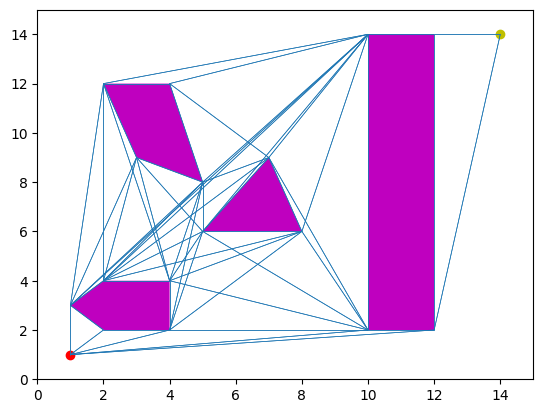

In [29]:
from matplotlib import collections  as mc

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

lc = mc.LineCollection(lines, linewidths=0.5)
ax.add_collection(lc)

ax.set_xlim([0,15])
ax.set_ylim([0,15])

plt.show()